# Trabajo práctico Nro 1

In [574]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer, roc_auc_score, \
auc, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
#pip install phik
import phik
from phik import resources, report

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [410]:
# Levanto el dataset y hago un par de chequeos

hotel_bookings = pd.read_csv('Data/hotel_bookings.csv')

hotel_bookings.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29150,Resort Hotel,0,124,2016,October,43,22,2,2,2,0.0,0,BB,SWE,Groups,TA/TO,0,0,0,E,E,2,No Deposit,NaN,NaN,0,Transient-Party,75.00,1,2,Check-Out,2016-10-26
85406,City Hotel,0,25,2016,March,12,13,2,0,2,0.0,0,SC,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,93.00,1,1,Check-Out,2016-03-15
28384,Resort Hotel,0,94,2016,September,40,29,0,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,242.0,NaN,0,Transient,125.00,1,1,Check-Out,2016-10-02
82070,City Hotel,0,14,2015,December,51,14,1,4,1,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,NaN,0,Transient,58.00,0,0,Check-Out,2015-12-19
14601,Resort Hotel,0,0,2016,March,12,16,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,46.00,0,0,Check-Out,2016-03-17
62478,City Hotel,1,38,2017,January,2,14,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,Non Refund,NaN,67.0,0,Transient,75.00,0,0,Canceled,2016-12-07
93289,City Hotel,0,146,2016,July,29,16,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,99.45,0,1,Check-Out,2016-07-20
40931,City Hotel,1,145,2015,August,33,9,2,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-06-15
93810,City Hotel,0,4,2016,August,33,7,2,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,40.0,0,Transient,65.00,0,1,Check-Out,2016-08-10
11332,Resort Hotel,1,65,2017,May,18,3,3,9,2,0.0,0,Undefined,PRT,Groups,Corporate,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,95.00,0,0,Canceled,2017-03-21


In [397]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,total_of_special_requests,total_stay,cant_personas,tipo_familia,dif_tipo_hab,is_portugal,is_agent,is_company,tipo_hotel,semestre1
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.857911,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.571363,3.427900,1.969746,0.887587,0.124943,0.406986,0.863138,0.056931,0.664461,0.482536
std,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.575718,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.792798,2.557439,0.719322,0.506136,0.330656,0.491274,0.343703,0.231712,0.472181,0.499697
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,5.000000,69.000000,55.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### a) A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.

In [4]:
# Tipos de datos por columna

hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [406]:
# Tomo las variables categóticas y cuento frecuencias

vars_categoricas = hotel_bookings.select_dtypes(exclude=['int64', 'float64']).columns

for v in vars_categoricas:
    df_categorica = pd.DataFrame(hotel_bookings[v].value_counts())
    display(df_categorica)

,hotel
City Hotel,53238
Resort Hotel,33737


,arrival_date_month
August,11223
July,10015
May,8305
April,7868
June,7739
March,7485
October,6891
September,6649
February,6066
December,5105


,meal
BB,67641
SC,9461
HB,9036
Undefined,484
FB,353


,country
PRT,27220
GBR,10393
FRA,8820
ESP,7216
DEU,5380
...,...
AIA,1
NPL,1
MRT,1
NIC,1


,market_segment
Online TA,51445
Offline TA/TO,13820
Direct,11755
Groups,4841
Corporate,4186
Complementary,699
Aviation,227
Undefined,2


,distribution_channel
TA/TO,68823
Direct,12921
Corporate,5047
GDS,179
Undefined,5


,reserved_room_type
A,56221
D,17345
E,6028
F,2816
G,2047
B,998
C,912
H,596
P,6
L,6


,assigned_room_type
A,46027
D,22354
E,7166
F,3619
G,2493
C,2154
B,1816
H,706
I,357
K,276


,deposit_type
No Deposit,85854
Non Refund,1017
Refundable,104


,customer_type
Transient,71756
Transient-Party,11539
Contract,3138
Group,542


,tipo_familia
1,61754
0,16127
2,9094


,dif_tipo_hab
0,73914
1,13061


#### Falta describir qué representa cada variable y qué tipo tiene entre las opciones que ofrece (categórica, numérica u ordinal)

### b) Reportar si hay valores faltantes. ¿Cuántos son y en qué atributos se encuentran? En caso de haberlos, ¿es necesario y posible asignarles un valor?

In [422]:
# Primero cuento las columnas con NaN
cols_con_faltantes = hotel_bookings.isna().sum()
cols_con_faltantes = cols_con_faltantes[cols_con_faltantes!=0]
cols_con_faltantes

children        4
country       452
agent       12193
company     82137
dtype: int64

##### Children

In [423]:
hotel_bookings[hotel_bookings['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [424]:
hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') &
               (hotel_bookings['arrival_date_year'] == 2015) &
               (hotel_bookings['arrival_date_month'] == 'August') &
               (hotel_bookings['meal'] == 'BB') &
               (hotel_bookings['country'] == 'PRT') &
               (hotel_bookings['distribution_channel'] == 'Undefined')
              ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Parecen ser registros de los primeros donde no se guardaban necesariamente todos los datos. La mayoría parecen ser cancelados por lo que no habría que sacarlos. Al ser pocos no hace falta llenarlos o se podrían imputar con cualquier método

##### Country

In [425]:
faltante_pais =  hotel_bookings[hotel_bookings['country'].isna()]
faltante_pais

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [426]:
# Tomo las variables categóticas y cuento frecuencias relativas

vars_categoricas = hotel_bookings.select_dtypes(exclude=['int64', 'float64']).columns

for v in vars_categoricas:
    df_categorica = pd.DataFrame(hotel_bookings[v].value_counts() / hotel_bookings[v].count())
    display(df_categorica)

,hotel
City Hotel,0.611332
Resort Hotel,0.388668


,arrival_date_month
August,0.128805
July,0.115074
May,0.095599
April,0.090485
June,0.088848
March,0.085965
October,0.079340
September,0.076548
February,0.069774
December,0.058710


,meal
BB,0.777816
SC,0.108483
HB,0.103952
Undefined,0.005630
FB,0.004119


,country
PRT,0.315755
GBR,0.119997
FRA,0.101640
ESP,0.083410
DEU,0.061959
...,...
AIA,0.000012
NPL,0.000012
MRT,0.000012
NIC,0.000012


,market_segment
Online TA,0.590622
Offline TA/TO,0.158920
Direct,0.135063
Groups,0.056547
Corporate,0.048194
Complementary,0.008032
Aviation,0.002597
Undefined,0.000023


,distribution_channel
TA/TO,0.791123
Direct,0.148611
Corporate,0.058138
GDS,0.002071
Undefined,0.000057


,reserved_room_type
A,0.647078
D,0.199071
E,0.069214
F,0.032301
G,0.023479
B,0.011431
C,0.010470
H,0.006820
P,0.000069
L,0.000069


,assigned_room_type
A,0.529921
D,0.256671
E,0.082326
F,0.041501
G,0.028583
C,0.024772
B,0.020825
H,0.008078
I,0.004085
K,0.003158


,deposit_type
No Deposit,0.986899
Non Refund,0.011877
Refundable,0.001224


,customer_type
Transient,0.823676
Transient-Party,0.134182
Contract,0.035917
Group,0.006225


,reservation_status
Check-Out,0.725102
Canceled,0.263296
No-Show,0.011602


,reservation_status_date
2016-02-14,0.002414
2017-05-25,0.002346
2015-10-21,0.002277
2016-03-28,0.002243
2016-10-06,0.002243
...,...
2017-09-12,0.000011
2015-02-26,0.000011
2015-01-18,0.000011
2015-02-09,0.000011


In [427]:
for v in vars_categoricas:
    df_categorica = pd.DataFrame(faltante_pais[v].value_counts() / faltante_pais[v].count()) 
    display(df_categorica)

,hotel
Resort Hotel,0.986726
City Hotel,0.013274


,arrival_date_month
February,0.121681
January,0.121681
March,0.119469
October,0.112832
December,0.108407
November,0.092920
April,0.081858
July,0.073009
September,0.068584
August,0.046460


,meal
BB,0.911504
HB,0.064159
SC,0.015487
Undefined,0.008850


,country


,market_segment
Corporate,0.400442
Direct,0.345133
Online TA,0.163717
Offline TA/TO,0.070796
Groups,0.011062
Complementary,0.008850


,distribution_channel
Corporate,0.393805
Direct,0.356195
TA/TO,0.250000


,reserved_room_type
A,0.803097
E,0.081858
D,0.061947
G,0.024336
F,0.015487
P,0.011062
C,0.002212


,assigned_room_type
A,0.358407
D,0.340708
E,0.148230
C,0.046460
F,0.042035
G,0.030973
I,0.013274
P,0.011062
H,0.008850


,deposit_type
No Deposit,0.997788
Non Refund,0.002212


,customer_type
Transient,0.913717
Transient-Party,0.070796
Group,0.015487


,reservation_status
Check-Out,0.924779
Canceled,0.066372
No-Show,0.008850


,reservation_status_date
2016-01-15,0.015487
2016-02-04,0.015487
2016-04-28,0.015487
2015-09-30,0.013274
2015-11-26,0.011062
...,...
2016-05-12,0.002212
2016-06-03,0.002212
2016-06-09,0.002212
2015-07-11,0.002212


Acá al revés... tienen mucho más frecuencia los no cancelados

In [428]:
faltante_pais.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,127.000000,167.000000,452.0,452.000000,452.000000,452.000000
mean,0.075221,22.482301,2015.926991,26.185841,15.420354,0.597345,1.984513,1.347345,0.028761,0.008850,0.008850,0.066372,1.586283,0.225664,217.118110,173.239521,0.0,61.323164,0.234513,0.522124
std,0.264040,50.268213,0.636284,17.149169,8.953951,1.468605,3.403693,0.516827,0.192003,0.115001,0.093759,0.274605,3.219823,0.543011,89.747053,112.125103,0.0,46.451638,0.424164,0.835438
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2016.000000,9.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.500000,94.000000,0.0,35.000000,0.000000,0.000000
50%,0.000000,3.000000,2016.000000,27.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,154.000000,0.0,45.000000,0.000000,0.000000
75%,0.000000,11.000000,2016.000000,43.000000,23.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,241.500000,269.000000,0.0,68.000000,0.000000,1.000000
max,1.000000,267.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,3.000000,2.000000,2.000000,1.000000,2.000000,29.000000,4.000000,468.000000,490.000000,0.0,305.000000,1.000000,5.000000


In [429]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Parece que son menos huéspedes (adultos y niños) y que pasan menos noches. Piden comidas en formato Bed & Breakfast. Suelen ser corporativos. Sin depósitos. Menos cancelaciones. Tienen menos reservas a través de agentes y más a través de companias. 

Hipótesis: Son clientes corporativos de empresas multinacionales. Por eso se registra menos el país de origen.

##### Agent y Company

In [430]:
hotel_bookings[(hotel_bookings['agent'].isna()) & (hotel_bookings['agent'].notna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [431]:
hotel_bookings[(hotel_bookings['agent'].notna()) & (hotel_bookings['agent'].isna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


No hay casos en los que estén ambos compos.

Estos campos parecerían indicar el id del agente/compañia a través del cual se hizo la reserva. Un faltante indicaría entonces que la reserva se hizo directa. 

De ser así el caso no sé si conviene dejarlo en nan o poner un cero. Otra opción es crear otra columna que indique si la reserva fue hecha a través de agente, de compañía o directa 

#### Arrancamos con tratamiento de faltantes y creando variables categóricas

In [432]:
# Tratamiento de datos faltantes
cols_con_faltantes

children        4
country       452
agent       12193
company     82137
dtype: int64

In [433]:
# Tratamiento de datos faltantes para children
hotel_bookings['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [434]:
# Son solo 4 datos los faltantes, se le asigna cero porques es donde mas valores faltantes hay
hotel_bookings.loc[hotel_bookings.loc[:, 'children'].isna(),"children"] = 0

#### Veamos también los duplicados

In [435]:
hotel_bookings.duplicated().value_counts()

False    87396
dtype: int64

In [436]:
hotel_bookings[hotel_bookings.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


##### Es muy alta la proporción de duplicados, parece ser un error. Vamos a eliminarlos

In [437]:
hotel_bookings.drop_duplicates(inplace=True)

In [438]:
hotel_bookings.duplicated().value_counts()

False    87396
dtype: int64

### c) ¿Qué variables se correlacionan más con la cancelación de la reserva? Para las cuatro más correlacionadas, mostrar un scatter plot en el que el eje x corresponda a la variable correlacionada, y el eje y a la cancelación.

In [439]:
#calculo el coeficiente de relación usando pearson
hotel_bookings.corr(method="pearson")


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.044359,0.009040,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.023698,0.143630,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.020110,0.250194,-0.027939,0.176088,-0.039807,0.064268
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.017685,-0.093838,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.008830,0.031916,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.126838,0.050211,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.165014,0.147486,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,-0.036651,0.216502,-0.015740,0.248999,0.007802,0.112772
children,0.067369,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,0.028056,0.038657,-0.020419,0.326293,0.036332,0.044596
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.035219,0.024804,-0.006840,0.023446,0.030885,0.094820


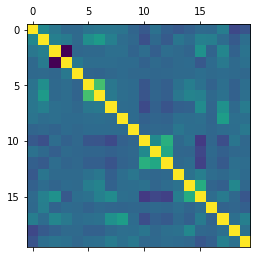

In [440]:
# Correlacion gráfica
plt.matshow(hotel_bookings.corr(method="pearson"))

In [441]:
# 4 variables mas correlacionadas con la cancelacion de la reserva
hotel_bookings.corr(method="pearson")["is_canceled"].sort_values(ascending=False).head()

is_canceled             1.000000
lead_time               0.184806
adr                     0.127986
arrival_date_year       0.088030
stays_in_week_nights    0.082928
Name: is_canceled, dtype: float64

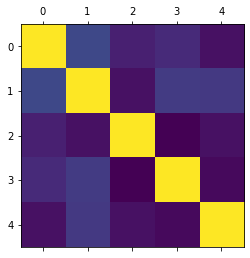

In [442]:
# Visto graficamente las 4 mas correlacionadas
plt.matshow(hotel_bookings.loc[:,["is_canceled","lead_time","previous_cancellations","adults","days_in_waiting_list"]]
            .corr(method="pearson"))



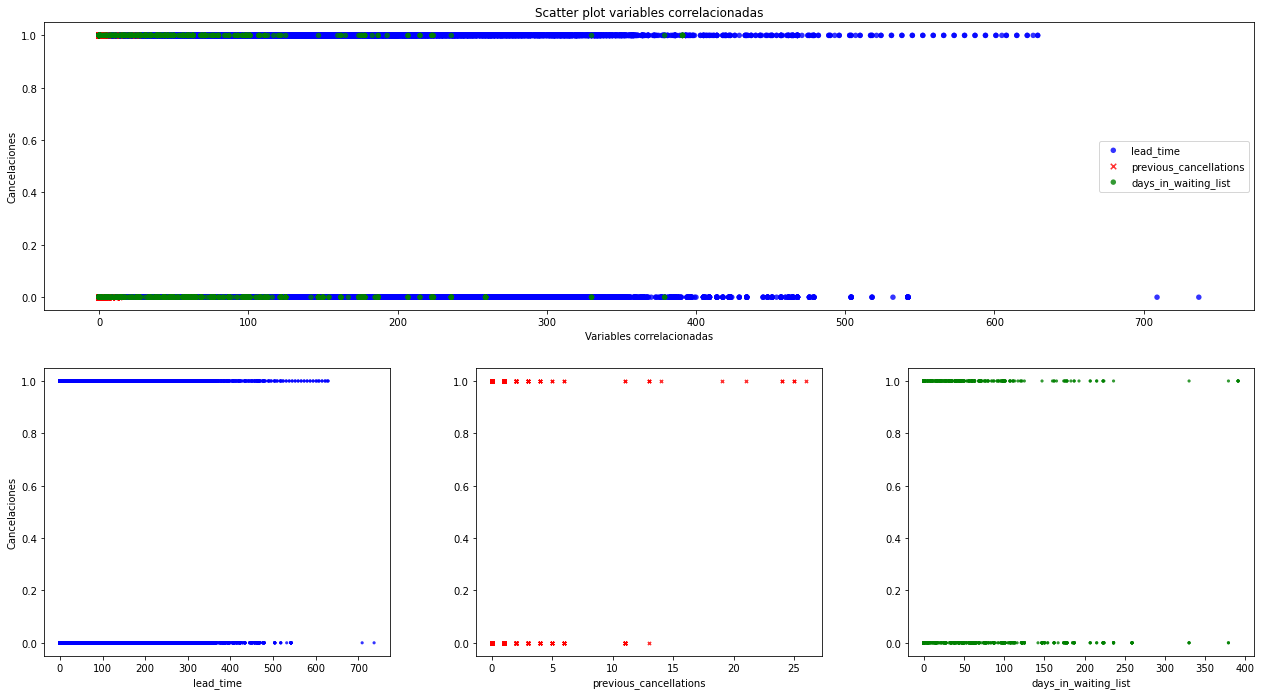

In [443]:
# Scatter plot variables correlacionadas
ejeY = hotel_bookings.loc[:,"is_canceled"]
ejeX = (hotel_bookings.loc[:,"lead_time"], hotel_bookings.loc[:,"previous_cancellations"], hotel_bookings.loc[:,"days_in_waiting_list"])
colors = ("blue", "red", "green")
groups = ("lead_time", "previous_cancellations", "days_in_waiting_list")
marks = ("o","x","o")

# Create plot
fig = plt.figure()
ax = fig.add_axes([0,0,2.8,1])

for data, color, group, mark in zip(ejeX, colors, groups, marks):
    x = data
    ax.scatter(x, ejeY, alpha=0.8, c=color, marker=mark,edgecolors='none', s=30, label=group)

plt.title('Scatter plot variables correlacionadas')
plt.xlabel('Variables correlacionadas') 
plt.ylabel('Cancelaciones') 
plt.legend(loc=5)

ax1 = fig.add_axes([0,-1.2,0.8,1])
ax1.scatter(ejeX[0], ejeY, alpha=0.8, c=colors[0], edgecolors='none', s=10, marker=marks[0])
plt.ylabel('Cancelaciones')
plt.xlabel(groups[0])
ax2 = fig.add_axes([1,-1.2,0.8,1])
ax2.scatter(ejeX[1], ejeY, alpha=0.8, c=colors[1], edgecolors='none', s=10, marker=marks[1])
plt.xlabel(groups[1])
ax3 = fig.add_axes([2,-1.2,0.8,1])
ax3.scatter(ejeX[2], ejeY, alpha=0.8, c=colors[2], edgecolors='none', s=10, marker=marks[2])
plt.xlabel(groups[2])


plt.show()


### d) El dueño de un hotel les solicita que predigan con cierta antelación si un cliente cancelará su reserva. ¿Qué atributos utilizará como variables predictoras? ¿Por qué?

In [444]:
#Eliminacion de variables por no tenerlas al momento de predecir y por ser de tiempo

# porque descartamos - required car parking spaces
print(len(hotel_bookings[(hotel_bookings.is_canceled==1)&(hotel_bookings.required_car_parking_spaces!=0)]))

#descarte de columnas
variables_desc=['arrival_date_year','reservation_status','reservation_status_date','required_car_parking_spaces']

hotel_bookings.drop(variables_desc, inplace=True, axis=1)

0


In [445]:
#Creacion de variables

#Estadia total

hotel_bookings['total_stay']=hotel_bookings.stays_in_week_nights+hotel_bookings.stays_in_weekend_nights
print(len(hotel_bookings[(hotel_bookings.total_stay==0)]))

#que hacer con casos donde el total_stay=0

651


In [446]:
#cantidad total de personas
hotel_bookings['cant_personas']=hotel_bookings.adults+hotel_bookings.children+hotel_bookings.babies

print(len(hotel_bookings[(hotel_bookings.cant_personas==0)]))
#hay campos con cantidad de personas en 0 - le asigno a 1 adulto
hotel_bookings['adults']=np.where(hotel_bookings.cant_personas==0,1,hotel_bookings.adults)

166


In [447]:
# usos los datos de familia para arma una categorica

#Inicialmente lo arbi bastante pero algunas categorias tenian muy poca frecuencia
#0-Solo;1-Solo_adultos ; 2- Adultos con chicos; 3- Familia completo ; 4-Adultos con bebes
hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                        np.where((hotel_bookings.babies>0)&(hotel_bookings.children==0),4,
                                                   (np.where((hotel_bookings.babies==0)&(hotel_bookings.children>0),2,
                                                              3)))))


In [448]:
#Tipo de familia con solo 3 clases
#0-Solo;1-Solo_adultos ;  2- Familia completo 

hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                         2))
                                                                      

In [449]:
#Tipo de familia con solo 3 clases
#0-Solo;1-Solo_adultos ;  2- Familia completo 

hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                         2))
                                                                      

In [450]:
df_categorica = pd.DataFrame(hotel_bookings.tipo_familia.value_counts() / hotel_bookings.tipo_familia.count()) 
df_categorica.head()

,tipo_familia
1,0.710090
0,0.185752
2,0.104158


In [451]:
hotel_bookings['dif_tipo_hab']=np.where((hotel_bookings.assigned_room_type!=hotel_bookings.reserved_room_type),1,0)

df_categorica = pd.DataFrame(hotel_bookings.dif_tipo_hab.value_counts() / hotel_bookings.dif_tipo_hab.count()) 
df_categorica.head()


,dif_tipo_hab
0,0.850005
1,0.149995


c) ¿Qué variables se correlacionan más con la cancelación de la reserva? Para las cuatro más correlacionadas, mostrar un scatter plot en el que el eje x corresponda a la variable correlacionada, y el eje y a la cancelación - Vuelvo a hacer para descartar variables eliminadas e incluir  nuevas

In [452]:
target = 'is_canceled'

In [453]:
#Correlacion Pearson para continuas

corr = hotel_bookings.corr()
corr['correlacion_absoluta'] = corr[target].apply(lambda x: abs(x))
corr[['correlacion_absoluta', target]].sort_values(by = 'correlacion_absoluta', ascending = False)

,correlacion_absoluta,is_canceled
is_canceled,1.000000,1.000000
dif_tipo_hab,0.214366,-0.214366
lead_time,0.184806,0.184806
adr,0.127986,0.127986
total_of_special_requests,0.120545,-0.120545
cant_personas,0.100257,0.100257
tipo_familia,0.094782,0.094782
booking_changes,0.093644,-0.093644
is_repeated_guest,0.089643,-0.089643
total_stay,0.084102,0.084102


In [454]:
#correlacion phik para continuas y categoricas

#pip install phik
import phik
from phik import resources, report

# get the phi_k correlation matrix between all variables
hotel_bookings.phik_matrix()

interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stay', 'cant_personas', 'tipo_familia', 'dif_tipo_hab']


c:\users\juan.miguel.ferraro\appdata\local\programs\python\python37\lib\site-packages\phik\data_quality.py:58: UserWarning: The number of unique values of variable country is very large: 177. Are you sure this is not an interval variable? Analysis for pairs of variables including country might be slow.
  .format(col, df[col].nunique())


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,total_stay,cant_personas,tipo_familia,dif_tipo_hab
hotel,1.000000,0.112061,0.117439,0.076559,0.071446,0.027866,0.239503,0.392643,0.019404,0.020920,0.035675,0.284977,0.444575,0.239438,0.115593,0.071899,0.032953,0.030483,0.405384,0.476626,0.039172,0.034017,0.972704,0.661132,0.047786,0.092000,0.000000,0.031047,0.398440,0.011809,0.019481,0.197051
is_canceled,0.112061,1.000000,0.219154,0.109451,0.100546,0.017889,0.076815,0.066829,0.026576,0.057531,0.016563,0.051471,0.234924,0.294144,0.124508,0.140146,0.023735,0.048453,0.074882,0.121255,0.042211,0.099638,0.132548,0.077400,0.014494,0.191337,0.000000,0.181892,0.058658,0.016867,0.058249,0.330309
lead_time,0.117439,0.219154,1.000000,0.282368,0.362224,0.074320,0.272850,0.307067,0.069370,0.057445,0.000000,0.166324,0.269059,0.264835,0.242548,0.179428,0.027180,0.049986,0.115848,0.067711,0.059206,0.280177,0.099313,0.688583,0.200218,0.184481,0.000000,0.050532,0.303866,0.063680,0.217564,0.143634
arrival_date_month,0.076559,0.109451,0.282368,1.000000,0.948926,0.111265,0.115864,0.132146,0.033702,0.129683,0.030376,0.123098,0.261681,0.179503,0.127077,0.121008,0.053102,0.046084,0.111279,0.096362,0.022847,0.113399,0.134403,0.387682,0.083450,0.212622,0.000000,0.110273,0.127185,0.026898,0.316428,0.155390
arrival_date_week_number,0.071446,0.100546,0.362224,0.948926,1.000000,0.293337,0.150903,0.177092,0.020274,0.155143,0.033767,0.146717,0.246543,0.147539,0.152481,0.124520,0.040963,0.062139,0.141111,0.066306,0.014777,0.081116,0.167531,0.490477,0.073187,0.164989,0.000000,0.079727,0.170517,0.020998,0.230085,0.150391
arrival_date_day_of_month,0.027866,0.017889,0.074320,0.111265,0.293337,1.000000,0.044747,0.051740,0.000000,0.025134,0.004588,0.065678,0.108467,0.036327,0.055297,0.017994,0.018338,0.000000,0.031783,0.026359,0.028825,0.054521,0.064912,0.316834,0.055357,0.041384,0.000000,0.009459,0.047574,0.008601,0.042248,0.026866
stays_in_weekend_nights,0.239503,0.076815,0.272850,0.115864,0.150903,0.044747,1.000000,0.982023,0.000000,0.053003,0.014954,0.192671,0.251255,0.165310,0.164383,0.134969,0.000000,0.040085,0.150049,0.107422,0.584821,0.031731,0.132652,0.182122,0.000000,0.166642,0.000000,0.041567,0.987335,0.000000,0.177126,0.137952
stays_in_week_nights,0.392643,0.066829,0.307067,0.132146,0.177092,0.051740,0.982023,1.000000,0.000000,0.050308,0.025787,0.260530,0.265538,0.154803,0.098994,0.083135,0.000000,0.013728,0.182478,0.117603,0.484809,0.032891,0.205092,0.240745,0.000000,0.194785,0.000000,0.025459,0.997683,0.012430,0.125528,0.112245
adults,0.019404,0.026576,0.069370,0.033702,0.020274,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.014884,0.011652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053028,NaN,0.000000,0.142152,0.000000,0.000000,0.006131,0.977025,0.000000,0.000000
children,0.020920,0.057531,0.057445,0.129683,0.155143,0.025134,0.053003,0.050308,0.000000,1.000000,0.060465,0.139472,0.100524,0.124432,0.115537,0.039349,0.000000,0.016095,0.690087,0.496909,0.032101,0.031258,0.118635,0.085061,0.012146,0.055867,0.000000,0.071991,0.047496,0.504180,0.694048,0.047771


### e) ¿Se encuentra balanceado el conjunto de datos que utilizará para desarrollar el algoritmo diseñado para contestar el punto d)? En base a lo respondido, ¿qué métricas de performance reportaría y por qué?

In [455]:
freqs = hotel_bookings['is_canceled'].value_counts() / hotel_bookings['is_canceled'].count()
freqs

0    0.725102
1    0.274898
Name: is_canceled, dtype: float64

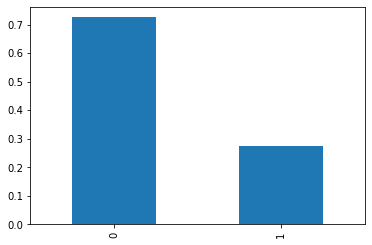

In [456]:
fig, ax = plt.subplots()
freqs.plot(ax=ax, kind='bar')

#### El dataset está desbalanceado 63/37, por lo que no utilizaríamos una métrica como el Accuracy. Las métricas que eligiríamos pueden ser el Recall y la Precision. O, si queremos combinar todo en una sóla métrica, usaríamos Fβ o el área bajo la curva ROC (AUC).

### f) Suponiendo que al dueño del hotel le importa detectar todas las cancelaciones. ¿Qué medida de performance utilizaría? Si utiliza Fβ-Score, ¿qué valor de β eligiría?

#### En este caso tendría que darle más importancia al Recall que a la Precision, es decir, aceptar más falsos positivos con tal de encontrar una mayor cantidad de verdaderos positivos. La β que elegiríamos en este caso tendría que ser mayor que 1, así que usaremos el F2, que es el valor que más se utiliza

### g) Implementar el algoritmo introducido en el punto d) utilizando árboles de decisión. En primer lugar, se deberá separar un 20% de los datos para usarlos como conjunto de evaluación (test set). El conjunto restante (80%) es el de desarrollo y es con el que se deberá continuar haciendo el trabajo. Realizar los siguientes puntos:

In [457]:
# Tratamiento de datos faltantes para country
hotel_bookings[hotel_bookings['country'].isna()] # 488 resultados

paises = hotel_bookings['country'].value_counts()
df_paises = pd.DataFrame(paises)
df_paises["porcentaje"] = df_paises["country"]/paises.sum()
df_paises

,country,porcentaje
PRT,27453,0.315755
GBR,10433,0.119997
FRA,8837,0.101640
ESP,7252,0.083410
DEU,5387,0.061959
...,...,...
AIA,1,0.000012
NPL,1,0.000012
MRT,1,0.000012
NIC,1,0.000012


In [458]:
# Dado que portugal representa el 40% de los datos, 
# se imputan los datos faltantes con el valor otros y portugal para posteriormente hacer dummies
hotel_bookings.loc[hotel_bookings.loc[:, 'country'].isna(),"country"] = "OTROS"

In [459]:
# Tratamiento de datos faltantes para agent y company
# agent        16340
# company     112593

hotel_bookings['agent'].value_counts()
hotel_bookings['company'].value_counts()

# interpretamos estos valores como "tiene agent si agent > 0" y "tiene company si company > 0" sino lo imputamos con 0
# por lo tanto los faltantes se imputan con 0
hotel_bookings.loc[hotel_bookings.loc[:, 'agent'].isna(),"agent"] = 0
hotel_bookings.loc[hotel_bookings.loc[:, 'company'].isna(),"company"] = 0

In [460]:
# verificamos que ya no haya faltantes en el dataset y cant_personas arrastro los NA de childrens, asi que se vuelve a 
# imputar
hotel_bookings['cant_personas']=hotel_bookings.adults+hotel_bookings.children+hotel_bookings.babies

# se verifica que no queden NA
any(hotel_bookings.isna().sum() != 0) 

False

In [461]:
# Creacion de variables Dummy para variables categoricas
# is_portugal imputa si se trata de portugal como pais (1) o si corresponde a otro pais (0)
hotel_bookings.loc[hotel_bookings.loc[:, 'country'] == "PRT","is_portugal"] = 1
hotel_bookings.loc[hotel_bookings.loc[:, 'country'] != "PRT","is_portugal"] = 0
hotel_bookings["is_portugal"].value_counts()

0.0    59943
1.0    27453
Name: is_portugal, dtype: int64

In [462]:
# Creacion de variables Dummy para variables categoricas
# is_agent imputa si tuvo un agent (1) o si no (0)
hotel_bookings.loc[hotel_bookings.loc[:, 'agent'] > 0 ,"is_agent"] = 1
hotel_bookings.loc[hotel_bookings.loc[:, 'agent'] <= 0 ,"is_agent"] = 0
hotel_bookings["is_agent"].value_counts()

1.0    75203
0.0    12193
Name: is_agent, dtype: int64

In [463]:
# Creacion de variables Dummy para variables categoricas
# is_company imputa si tuvo una company (1) o si no (0)
hotel_bookings.loc[hotel_bookings.loc[:, 'company'] > 0 ,"is_company"] = 1
hotel_bookings.loc[hotel_bookings.loc[:, 'company'] <= 0 ,"is_company"] = 0
hotel_bookings["is_company"].value_counts()

0.0    82137
1.0     5259
Name: is_company, dtype: int64

In [464]:
# Creacion de variables Dummy para variables categoricas
# tipo_hotel imputa si es City Hotel (1) o si es Resort Hotel (0)
hotel_bookings.loc[hotel_bookings.loc[:, 'hotel'] == "City Hotel" ,"tipo_hotel"] = 1
hotel_bookings.loc[hotel_bookings.loc[:, 'hotel'] == "Resort Hotel" ,"tipo_hotel"] = 0
hotel_bookings["tipo_hotel"].value_counts()

1.0    53428
0.0    33968
Name: tipo_hotel, dtype: int64

In [465]:
# Creacion de variables Dummy para variables categoricas
# arrival_date_month? imputa si es primer semestre (1) o si no (0)
semestre1=["January","February","March","April","May","June"]
hotel_bookings.loc[hotel_bookings['arrival_date_month'].isin(semestre1),"semestre1"] = 1
hotel_bookings.loc[~hotel_bookings['arrival_date_month'].isin(semestre1),"semestre1"] = 0
hotel_bookings["semestre1"].value_counts()


0.0    45064
1.0    42332
Name: semestre1, dtype: int64

In [466]:
#correlacion phik para continuas y categoricas
# get the phi_k correlation matrix between all variables
phik_correlations = hotel_bookings.phik_matrix()

interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stay', 'cant_personas', 'tipo_familia', 'dif_tipo_hab', 'is_portugal', 'is_agent', 'is_company', 'tipo_hotel', 'semestre1']


c:\users\juan.miguel.ferraro\appdata\local\programs\python\python37\lib\site-packages\phik\data_quality.py:58: UserWarning: The number of unique values of variable country is very large: 178. Are you sure this is not an interval variable? Analysis for pairs of variables including country might be slow.
  .format(col, df[col].nunique())


In [467]:
phik_correlations.iloc[1].sort_values(ascending=False).head(10)

is_canceled                  1.000000
dif_tipo_hab                 0.330309
market_segment               0.294144
country                      0.240673
lead_time                    0.219154
is_agent                     0.206909
is_portugal                  0.193303
customer_type                0.191337
total_of_special_requests    0.181892
is_company                   0.146851
Name: is_canceled, dtype: float64

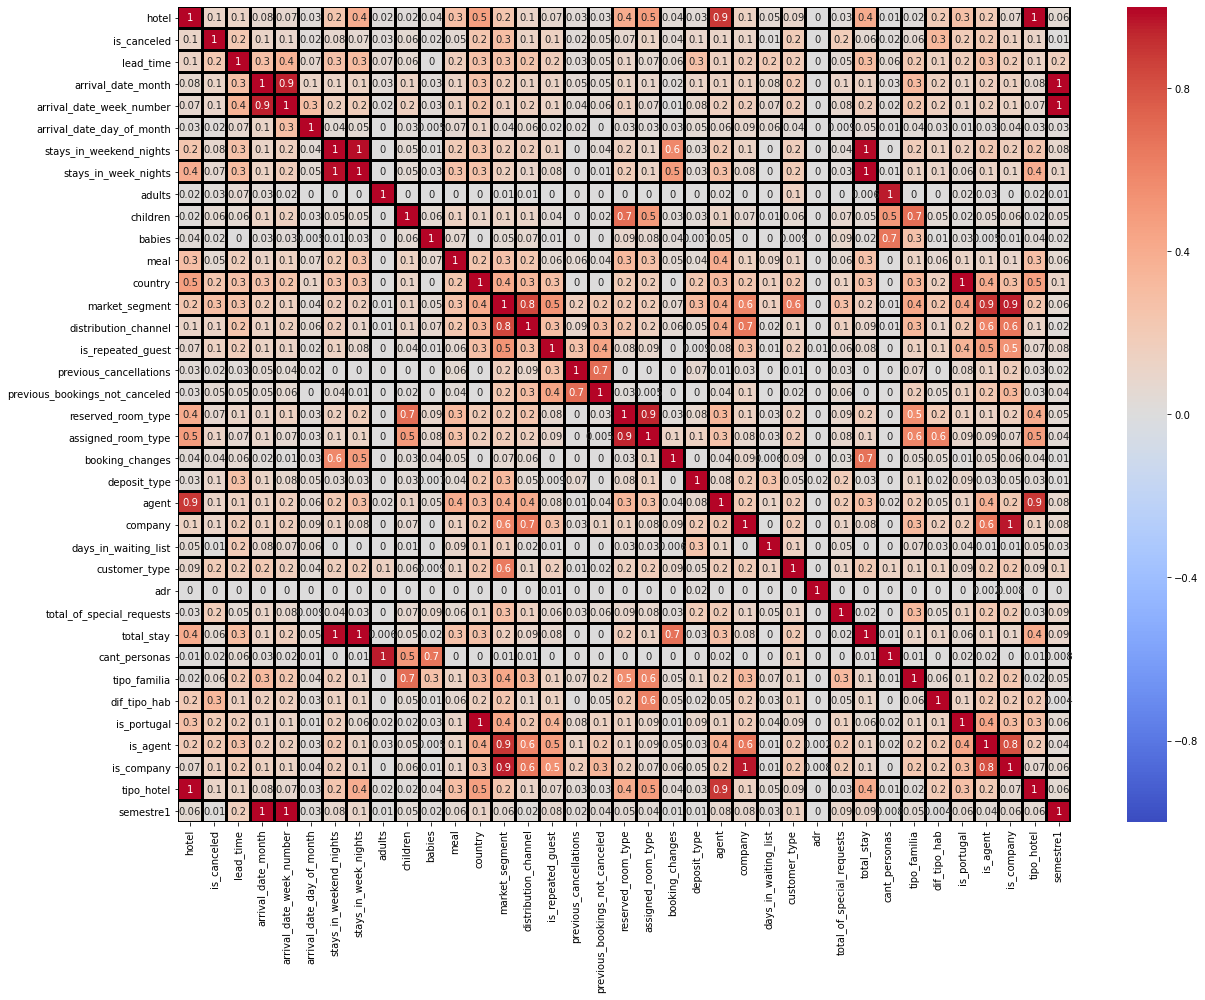

In [468]:
plt.figure(figsize=(20,15))
sns.heatmap(phik_correlations, annot = True, fmt='.1g', cmap= 'coolwarm', vmin=-1, vmax=1, center= 0, 
            linewidths=2, linecolor='black')

#### Ahora sí, seleccionamos las columnas y hacemos el split

In [469]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,total_of_special_requests,total_stay,cant_personas,tipo_familia,dif_tipo_hab,is_portugal,is_agent,is_company,tipo_hotel,semestre1
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,26.838334,15.815541,1.005263,2.625395,1.877695,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.698567,3.630658,2.027152,0.918406,0.149995,0.314122,0.860486,0.060174,0.611332,0.484370
std,0.446466,86.052325,13.674572,8.835146,1.031921,2.053584,0.622312,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.831946,2.763449,0.790661,0.532218,0.357069,0.464168,0.346484,0.237811,0.487450,0.499759
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,1.000000,5.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,5.000000,69.000000,55.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [470]:
# Uso las variables numéricas que tenemos hasta ahora, luego podríamos crear más. Por ej, el tipo de hotel
columnas = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
            'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stay', 'cant_personas', 'tipo_familia', 
            'dif_tipo_hab', 'is_portugal', 'is_agent', 'is_company', 'tipo_hotel', 'semestre1']

In [471]:
X_train, X_test, y_train, y_test = train_test_split(hotel_bookings[columnas], 
                                                        hotel_bookings['is_canceled'], test_size=0.2, 
                                                        random_state=42,stratify=hotel_bookings['is_canceled'])

#### 1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas.

In [472]:
# Instanciamos el arbol y creamos una lista de métricas
arbol = tree.DecisionTreeClassifier()
metricas_train=[]

#Usamos f2
f2_train=[]
f2_val=[]

# Creamos los árboles recursivamente 
for i in range(1,51):
    # Hacemos el split
    X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, 
                                                        y_train, test_size=0.2, 
                                                        random_state=i,stratify=y_train)
    # fitteamos y predecimos
    arbol.fit(X_train_val,y_train_val)
    y_pred_train = arbol.predict(X_train_val)
    y_pred_val = arbol.predict(X_val)

    # Guardamos las predicciones
    f2_train.append(fbeta_score(y_train_val,y_pred_train,beta=2))
    f2_val.append(fbeta_score(y_val,y_pred_val,beta=2))

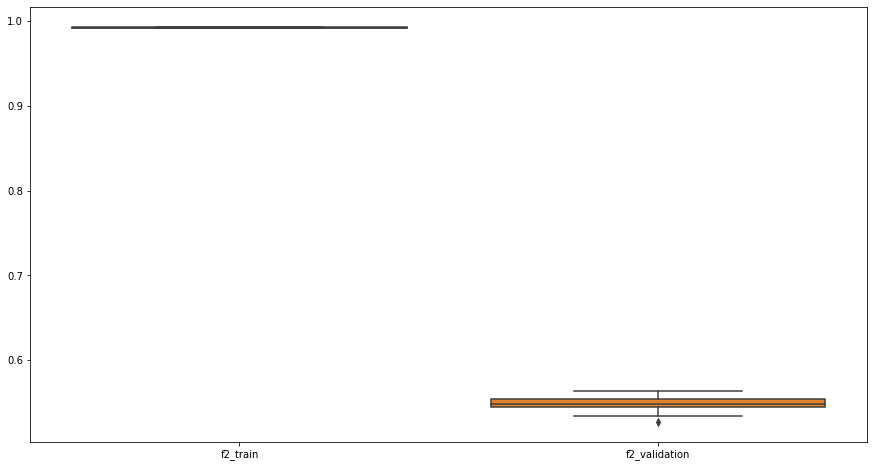

In [473]:
# Ploteamos los resultados obtenidos
metricas = pd.DataFrame({'f2_train': f2_train, 'f2_validation' : f2_val})

plt.figure(figsize=(15,8))
sns.boxplot(data=metricas)

##### Vemos que está claramente sobreajustando, obtenemos mejores resultados en train

#### 2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

In [474]:
#Instanciamos un nuevo árbol
arbol_cv = tree.DecisionTreeClassifier()

# El F2 no viene como metrica default en cross_validate, tenemos que crearla
f2_score = make_scorer(fbeta_score, beta=2)

# Corremos la validación cruzada 
cv_results = cross_validate(arbol_cv, X_train, y_train, cv=50, scoring=f2_score, return_train_score=True, n_jobs=-1, 
                            return_estimator=True)

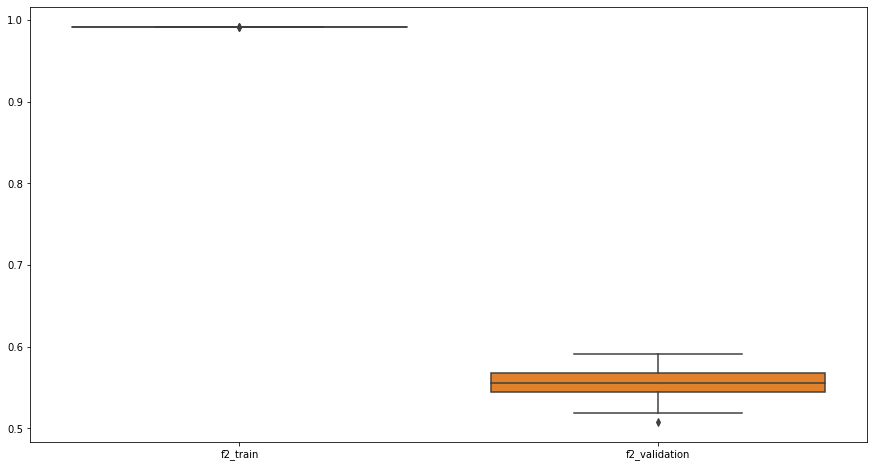

In [475]:
metricas = pd.DataFrame({'f2_train': cv_results['train_score'], 'f2_validation' : cv_results['test_score']})

plt.figure(figsize=(15,8))
sns.boxplot(data=metricas)

##### Igual de sobreajustado, pero notamos más dispersión en el set de validación. Esto puede ser porque tenemos muy pocas muestras en test: 2% vs. al 20% que teníamos en el ejercicio anterior

### h) Graficar el árbol de decisión con mejor performance encontrado en el punto g2). Analizar el árbol de decisión armado (atributos elegidos y decisiones evaluadas).

In [476]:
# Elijo el mejor modelo con los resultados de test
best_model_index = np.argmax(cv_results['test_score'], axis=0)
best_model = cv_results['estimator'][best_model_index]

In [477]:
best_model.get_depth()

45

In [488]:
relevancia = pd.DataFrame({'columnas' : columnas, 'feature_importance': best_model.feature_importances_})
relevancia.sort_values(by='feature_importance', ascending=False).head(5)

,columnas,feature_importance
0,lead_time,0.218681
13,adr,0.183090
2,arrival_date_day_of_month,0.108185
1,arrival_date_week_number,0.102736
14,total_of_special_requests,0.050827


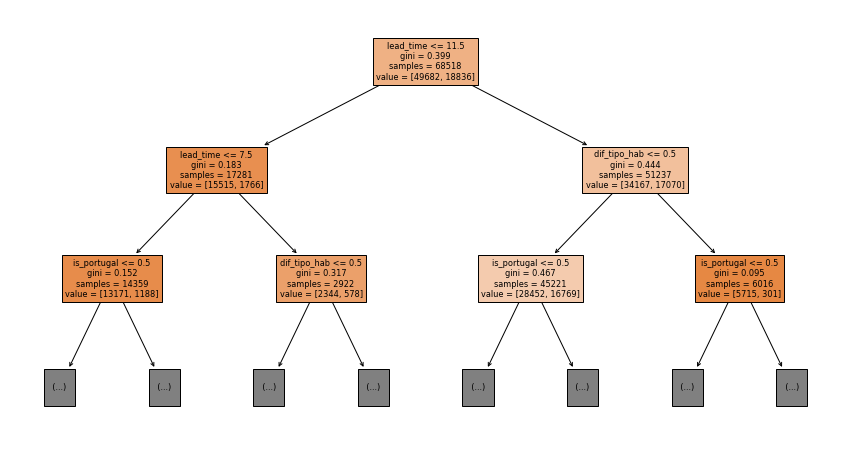

In [481]:
plt.figure(figsize=(15,8))

plot = tree.plot_tree(best_model, feature_names=columnas, filled=True, max_depth=2)

##### Analizando las variables que utiliza para el split, vemos que las variables que usa para la división son justo las 4 más correlacionadas

is_portugal                  0.503751 \
dif_tipo_hab                 0.379386 \
lead_time                    0.366321 

### i) Usando validación cruzada de 10 iteraciones (10-fold cross validation), probar distintos valores de α del algoritmo de poda mínima de complejidad de costos (algoritmo de poda de sklearn). Hacer gráficos de la performance en validación y entrenamiento en función del α. Explicar cómo varía la profundidad de los árboles al realizar la poda con distintos valores de α.

In [543]:
# Instanciamos un nuevo arbol y buscamos los alpha ideales
arbol_tuneado = tree.DecisionTreeClassifier()
path = arbol_tuneado.cost_complexity_pruning_path(X_train, y_train)
sample_alphas = np.random.choice(path.ccp_alphas,20)
sample_alphas = np.append(sample_alphas, [0, 0.00004, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, 0.00011])
sample_alphas.sort()
ccp_alphas = {'ccp_alpha' : sample_alphas}

In [544]:
ccp_alphas

{'ccp_alpha': array([0.00000000e+00, 4.76762591e-06, 1.19190648e-05, 1.28725900e-05,
        1.35082734e-05, 1.44534343e-05, 1.76035418e-05, 1.82036626e-05,
        1.90705037e-05, 1.90705037e-05, 1.99266099e-05, 2.33698806e-05,
        2.60882912e-05, 2.62219425e-05, 2.75841214e-05, 3.05128058e-05,
        3.05408507e-05, 3.90561553e-05, 4.00000000e-05, 4.29186065e-05,
        5.00000000e-05, 5.93711321e-05, 6.00000000e-05, 7.00000000e-05,
        8.00000000e-05, 9.00000000e-05, 9.39310443e-05, 1.00000000e-04,
        1.10000000e-04])}

In [545]:
# Hacemos la búsqueda de hiperparametros
grid = GridSearchCV(arbol_tuneado, param_grid= ccp_alphas, scoring=f2_score, n_jobs=-1, cv=10, verbose=1, 
                    return_train_score=True)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.00000000e+00, 4.76762591e-06, 1.19190648e-05, 1.28725900e-05,
       1.35082734e-05, 1.44534343e-05, 1.76035418e-05, 1.82036626e-05,
       1.90705037e-05, 1.90705037e-05, 1.99266099e-05, 2.33698806e-05,
       2.60882912e-05, 2.62219425e-05, 2.75841214e-05, 3.05128058e-05,
       3.05408507e-05, 3.90561553e-05, 4.00000000e-05, 4.29186065e-05,
       5.00000000e-05, 5.93711321e-05, 6.00000000e-05, 7.00000000e-05,
       8.00000000e-05, 9.00000000e-05, 9.39310443e-05, 1.00000000e-04,
       1.10000000e-04])},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

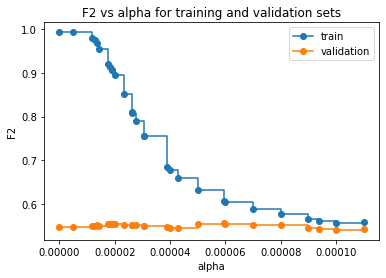

In [546]:
train_scores = grid.cv_results_['mean_train_score']
validation_scores = grid.cv_results_['mean_test_score']
alphas = ccp_alphas['ccp_alpha']

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("F2")
ax.set_title("F2 vs alpha for training and validation sets")
ax.plot(alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, validation_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

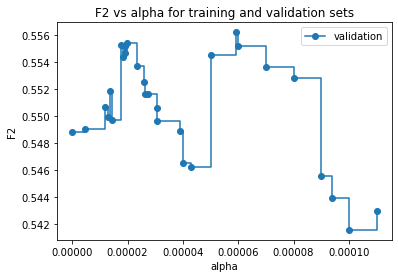

In [547]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("F2")
ax.set_title("F2 vs alpha for training and validation sets")
ax.plot(alphas, validation_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [548]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=5.937113213936999e-05)

In [549]:
grid.best_estimator_.get_depth()

21

##### Vemos que el train decrece y se parece más al validation a medida que aumenta el alpha. Esto es porque al aumentar alpha el árbol se hace más chico y disminuye el sobreajuste. 

##### Validación aumenta al reducir el sobreajuste, marcando dos picos para diferentes alphas

##### Veamos la relación del alpha con la profundidad del arbol:

In [550]:
# Gridsearch no guarda todos los estimadores, así que lo tenemos que volver a correr "a mano"
clfs = []
for alpha in sample_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, sample_alphas[-1]))

Number of nodes in the last tree is: 279 with ccp_alpha: 0.00011


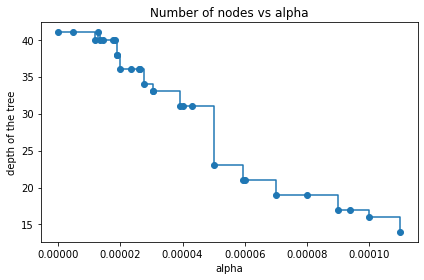

In [551]:
# Lo graficamos

depth_counts = [clf.get_depth() for clf in clfs]
fig, ax = plt.subplots()
ax.plot(sample_alphas, depth_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of the tree")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

##### Como dijimos, la profundidad del árbol disminuye al aumentar alpha

### i) Evaluar en el conjunto de evaluación, el árbol correspondiente al α que maximice la performance en el conjunto de validación. Comparar con el caso sin poda (α=0)

In [552]:
# El mejor modelo del Gridsearch (ccp_alpha=1.972691591538556e-05)
grid.score(X_test, y_test)

0.5576914769536481

In [553]:
arbol = tree.DecisionTreeClassifier()

cv_results = cross_validate(arbol, X_train, y_train, cv=10, scoring=f2_score, return_train_score=True, 
                                  n_jobs=-1, return_estimator=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.6s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


In [554]:
# Elijo el mejor modelo con los resultados de test
best_model_index = np.argmax(cv_results['test_score'], axis=0)
best_model = cv_results['estimator'][best_model_index]

f2_score(best_model, X_test, y_test)

0.5555326091446038

##### Da apenas mejor en el arbol sin poda, está dentro de las posibilidades esta diferencia, de acuerdo a lo que vimos en el gráfico alpha vs score. Hay que notar que dan peor en ambos casos que clasificar a todos como positivos. Una manera de solucionarlo podría ser moviendo el umbral con la curva recall-precision:

In [558]:
print(roc_auc_score(y_test,grid.predict(X_test)))
print(accuracy_score(y_test,grid.predict(X_test)))
print(recall_score(y_test,grid.predict(X_test)))
print(precision_score(y_test,grid.predict(X_test)))

0.7155423652630089
0.795766590389016
0.5373569198751301
0.6571646729447697


Logistic: f1=0.591 auc=0.657


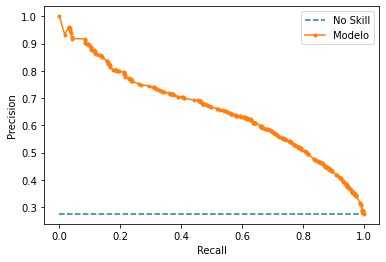

In [575]:
# predict probabilities
lr_probs = grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Modelo')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### g) Para el árbol sin poda, obtener la importancia de los descriptores usando la técnica de eliminación recursiva. Reentrenar el árbol usando sólo los 3 descriptores más importantes. Comparar la performance en el conjunto de prueba.

In [518]:
arbol = tree.DecisionTreeClassifier()

rfecv = RFECV(estimator=arbol, step=1, cv=10,
              scoring=f2_score, n_jobs=-1, verbose=1)

rfecv.fit(X_train, y_train)

Fitting estimator with 24 features.
Fitting estimator with 23 features.


RFECV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
      scoring=make_scorer(fbeta_score, beta=2), verbose=1)

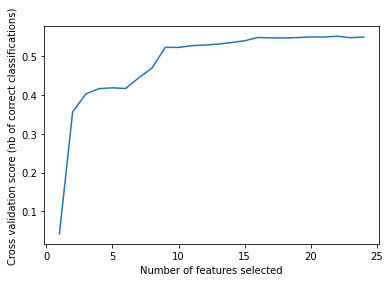

In [519]:
# Veamos como queda según cantidad de features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

##### Tiene la forma que esperábamos, con las primeras variables explicando la mayor parte de la ganancia de score

##### Ahora veamos cuales son las 3 más importantes

In [520]:
arbol = tree.DecisionTreeClassifier()

rfe = RFE(estimator=arbol, step=1, n_features_to_select=3)

rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [521]:
rfe.estimator.splitter

'best'

In [522]:
columnas = np.array(columnas) 
mejores_columnas = columnas[rfe.support_]
mejores_columnas

array(['lead_time', 'arrival_date_day_of_month', 'adr'], dtype='<U30')

##### Las principales culumnas resultaron ser 'lead_time', 'arrival_date_day_of_month', 'adr'. Esto es similar a lo que vimos en el análisis de feature importances que vimos arriba
##### Vamos a probar volver a correr con estas columnas

In [523]:
# Hacemos la búsqueda de hiperparametros
arbol_tuneado = tree.DecisionTreeClassifier()
grid = GridSearchCV(arbol_tuneado, param_grid= ccp_alphas, scoring=f2_score, n_jobs=-1, cv=10, verbose=1, 
                    return_train_score=True)
grid.fit(X_train[mejores_columnas],y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:  1.3min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.00000000e+00, 9.53525183e-06, 9.53525183e-06, 1.14423022e-05,
       1.30026161e-05, 1.31109713e-05, 1.34089479e-05, 1.39055756e-05,
       1.40006982e-05, 1.52564029e-05, 1.82758993e-05, 1.97269159e-05,
       2.10642381e-05, 2.11055163e-05, 2.11704140e-05, 2.14543166e-05,
       2.82075090e-05, 3.61452569e-05, 3.73865166e-05, 3.78311116e-05,
       4.00000000e-05, 5.00000000e-05, 5.04072746e-05, 6.00000000e-05,
       7.00000000e-05, 8.00000000e-05, 9.00000000e-05, 1.00000000e-04,
       1.10000000e-04])},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

In [524]:
grid.best_estimator_.feature_importances_

array([0.38488824, 0.266828  , 0.34828376])

In [525]:
grid.score(X_test[mejores_columnas], y_test)

0.40756337558372246

##### La performance cae lo esperable, según lo que vimos en el CV. Podemos ver que gran parte del poder predictivo estaba dado por esas 3 variables más importantes.

##### En el gráfico de abajo se ve como correlaciones no lineales de entre lead_time y adr explican parte de las cancelaciones. Esta no linealidad justifica el hecho de que no se hayan encontrado fuertes correlaciones entre el las cancelaciones y la adr

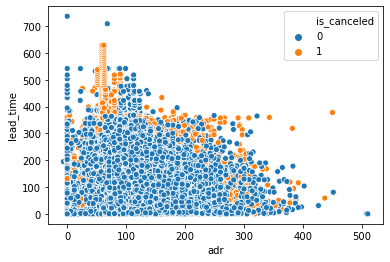

In [526]:
hotel_clean = hotel_bookings[hotel_bookings['adr'] < 1000]
sns.scatterplot(x=hotel_clean['adr'], y=hotel_clean['lead_time'], hue=hotel_clean['is_canceled'])